In [12]:
import numpy as np
import pandas as pd
lotto = pd.read_csv('data/모의고사/모의고사 1회/lotto.csv')
lotto.time_id = lotto['time_id'].astype('str')
lotto.head()

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44


In [13]:
# pd.melt(lotto, id_vars='time_id')
lotto_ary = lotto.set_index('time_id').T.to_dict('list')

In [23]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(lotto_ary.values()).transform(lotto_ary.values())
df = pd.DataFrame(te_ary, columns=te.columns_)
df.shape

(859, 45)

In [45]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
fre_set = apriori(df, min_support=0.002, use_colnames=True)
# fre_set['length'] = fre_set['itemsets'].apply(lambda x: len(x))

fre_rule = association_rules(fre_set,metric="confidence", min_threshold=0.8)

In [47]:
fre_rule.sort_values(by="lift",ascending=False).iloc[:30,:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
703,"(16, 26, 31)","(43, 36)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
643,"(24, 34, 22)","(31, 7)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
642,"(34, 31, 7)","(24, 22)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
682,"(26, 21, 14)","(18, 15)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
652,"(34, 10, 36)","(44, 22)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
646,"(24, 22, 31)","(34, 7)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
666,"(24, 20, 15)","(12, 30)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
702,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
700,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf
653,"(34, 10, 22)","(36, 44)",0.002328,0.016298,0.002328,1.0,61.357143,0.002290,inf


<AxesSubplot:>

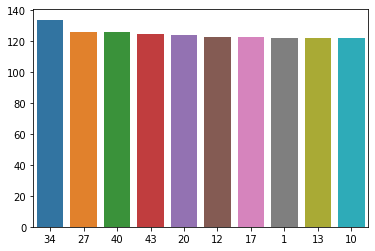

In [82]:
k = []
data = np.array([k+_ for _ in lotto_ary.values()]).flatten()
data = pd.Series(data)
import seaborn as sns
sns.barplot(x=data.value_counts(ascending=False).index[:10] ,y = data.value_counts(ascending=False)[:10], order=data.value_counts(ascending=False).index[:10])

In [90]:
most_fre = fre_rule[fre_rule['consequents'].str.contains('34')]
most_fre

KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              ...\n              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n             dtype='float64', length=704)] are in the [columns]"

In [110]:
conse = fre_rule['consequents']
conse.astype('str').str.contains('34').value_counts()

False    681
True      23
Name: consequents, dtype: int64

# 2

In [135]:
fifa = pd.read_csv('data/모의고사/모의고사 1회/FIFA.csv', encoding='cp949')
fifa.head()
# euc-kr

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


In [136]:
height = fifa['Height'].str.split("'",expand = True)
height
fifa['Height'] = height[0].astype('int16') * 30 + height[1].astype('int16') * 2.5
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,167.5,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,185.0,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,172.5,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,190.0,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,177.5,154,196400,102000,355


In [137]:
def reposition(x):
    if x == 'GK':
        return 'GoalKeeper'
    elif x in ['LS','ST','RS','LW','LF','CF','RF','RW']:
        return 'Forward'
    elif x in ['LAM','CAM','RAM','LM','CM','LCM','RCM','RM']:
        return 'Midfielder'
    else:
        return 'Defender'
fifa["Position"] = fifa["Position"].map(lambda x:reposition(x))
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,Forward,10,2021,167.5,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,Forward,7,2022,185.0,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,Forward,10,2022,172.5,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GoalKeeper,1,2020,190.0,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,Midfielder,7,2023,177.5,154,196400,102000,355


In [138]:
fifa1 = pd.get_dummies(fifa, columns = ['Position'],drop_first=True)

In [139]:
fifa1

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Position_Forward,Position_GoalKeeper,Position_Midfielder
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,10,2021,167.5,159,226500,110500,565,1,0,0
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,7,2022,185.0,183,127100,77000,405,1,0,0
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,10,2022,172.5,150,228100,118500,290,1,0,0
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,1,2020,190.0,168,138600,72000,260,0,1,0
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,7,2023,177.5,154,196400,102000,355,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,238813,J. Lundstram,19,England,47,Crewe Alexandra,Right,Medium/ Medium,22,2019,172.5,134,143,60,1,0,0,1
16638,243165,N. Christoffersson,19,Sweden,47,Trelleborgs FF,Right,Medium/ Medium,21,2020,187.5,170,113,60,1,1,0,0
16639,241638,B. Worman,16,England,47,Cambridge United,Right,Medium/ Medium,33,2021,170.0,148,165,60,1,1,0,0
16640,246268,D. Walker-Rice,17,England,47,Tranmere Rovers,Right,Medium/ Medium,34,2019,175.0,154,143,60,1,1,0,0


In [142]:
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

formula = "Value ~ C(Position)"
lm = ols(formula, fifa).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(Position),3.0,4.081181e+09,1.360394e+09,41.873906,5.988667e-27
Residual,16638.0,5.405330e+11,3.248786e+07,NaN,NaN


In [144]:
print(pairwise_tukeyhsd(fifa["Value"], fifa["Position"]))

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1     group2    meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------
  Defender    Forward    930.373  0.001   610.7429  1250.0031   True
  Defender GoalKeeper  -507.3848 0.0034  -887.6261  -127.1436   True
  Defender Midfielder   760.8787  0.001   486.7123   1035.045   True
   Forward GoalKeeper -1437.7579  0.001 -1865.9234 -1009.5923   True
   Forward Midfielder  -169.4944 0.5609  -506.9991   168.0104  False
GoalKeeper Midfielder  1268.2635  0.001   872.8782  1663.6488   True
--------------------------------------------------------------------


In [146]:
fifa.groupby('Position')['Value'].mean()

Position
Defender      2104.653260
Forward       3035.026281
GoalKeeper    1597.268421
Midfielder    2865.531915
Name: Value, dtype: float64

In [148]:
formula = "Value ~ C(Position) * C(Preferred_Foot)"
lm = ols(formula, fifa).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(Position),3.0,4.081181e+09,1.360394e+09,41.912369,5.658225e-27
C(Preferred_Foot),1.0,1.522715e+08,1.522715e+08,4.691332,3.032930e-02
C(Position):C(Preferred_Foot),3.0,4.736156e+08,1.578719e+08,4.863874,2.207249e-03
Residual,16634.0,5.399071e+11,3.245805e+07,NaN,NaN


# 3

In [161]:
k = []
with open('data/모의고사/모의고사 1회/영화 기생충_review.txt','r') as f:
    for _ in f.readlines():
        k.append(_.split('\n')[0])

d= []
with open('data/모의고사/모의고사 1회/영화 기생충_사전.txt','r') as g:
    for _ in g.readlines():
        d.append(_.split('\n')[0])
    
data = pd.Series(k)
data.head()

0                             별1개  준 사람들은   나베당임
1                                             역쉬
2         영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..
3    지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  Bomb!!!
4                           대단한 영화. 몰입력 장난아님. 후아
dtype: object

In [171]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [174]:
import re
data = data.str.lower()
data = data.str.replace(r'[0-9]','')
data = data.str.replace('[' + punctuation + ']','')
data = data.str.strip()
data.head()

0                          별개  준 사람들은   나베당임
1                                         역쉬
2       영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다
3    지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음  bomb
4                         대단한 영화 몰입력 장난아님 후아
dtype: object

In [179]:
d

['기생충',
 '봉준호',
 '송강호',
 '기택',
 '이선균',
 '박사장',
 '조여정',
 '연교',
 '최우식',
 '기우',
 '박소담',
 '기정',
 '장혜진',
 '충숙',
 '이정은',
 '이지혜',
 '박서준']

In [190]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)
tdm = cv.fit_transform(data)

In [227]:
from konlpy.tag import Kkma
from nltk import Text
ma = Kkma().nouns(' '.join([_ for _ in data]))

In [232]:
ma = pd.Series(ma).value_counts()
ma[ma.index.str.match('|'.join([_ for _ in d]))]

송강호가       2
봉준호표       1
조여정씨       1
봉준호장르      1
기생충        1
기생충이자      1
송강호        1
송강호때문      1
봉준호        1
박사장        1
봉준호감독      1
봉준호영화      1
봉준호스타일     1
기택         1
기정         1
송강호여       1
송강호랑       1
최우식도       1
봉준호짱       1
기생충인가      1
조여정        1
기생충때문      1
송강호님       1
기우         1
기생충대박예감    1
송강호씨       1
송강호배우      1
박소담        1
dtype: int64

In [182]:
dummy = pd.DataFrame(np.zeros(((len(data),len(d)))), columns = d)

In [201]:
from sklearn.feature_extraction.text import CountVectorizer

docs = ['why hello there', 'omg hello pony', 'she went there? omg']
vec = CountVectorizer()
X = vec.fit_transform(data)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names()) 
df1 = df.sum(axis=0)
df1

age           1
alme          1
arasie기생충이    1
ava           1
bd            1
             ..
힘들지           1
힘들지만          1
힘듬            1
힘이            2
힘이다           1
Length: 6830, dtype: int64

In [233]:
df1[df1.index.isin(d)]

기생충    17
기정      1
박사장     1
박소담     2
봉준호    78
송강호    29
이선균    10
이정은     3
장혜진     1
조여정    10
최우식     4
dtype: int64

In [219]:
'|'.join([_ for _ in d])

'기생충봉준호송강호기택이선균박사장조여정연교최우식기우박소담기정장혜진충숙이정은이지혜박서준'

In [217]:
[len(_) for _ in d]

[3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3]

In [ ]:
wordcloud = WordCloud(font_path='font/NanumGothic.ttf', background_color='white').generate(text)
imshow